# Machine Leraning Cluster K-Means

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [2]:
rfm= pd.read_excel("rfm_data.xlsx")

In [3]:
rfm.head()

,CustomerID,Recency,Tenure,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Tenure_Score,RFM_SCORE,Segment
0,12346,326,326,1,77183.60,2,5,1,1,251,cant_loose
1,12347,368,3,7,4310.00,1,1,1,5,111,hibernating
2,12348,359,76,4,1797.24,1,2,2,2,122,hibernating
3,12349,19,19,1,1757.55,5,5,2,4,552,champions
4,12350,311,311,1,334.40,2,5,4,1,254,cant_loose


In [4]:
rfm["Basket_Size"] = rfm["Monetary"] / rfm["Frequency"]
rfm.head()

,CustomerID,Recency,Tenure,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Tenure_Score,RFM_SCORE,Segment,Basket_Size
0,12346,326,326,1,77183.60,2,5,1,1,251,cant_loose,77183.600000
1,12347,368,3,7,4310.00,1,1,1,5,111,hibernating,615.714286
2,12348,359,76,4,1797.24,1,2,2,2,122,hibernating,449.310000
3,12349,19,19,1,1757.55,5,5,2,4,552,champions,1757.550000
4,12350,311,311,1,334.40,2,5,4,1,254,cant_loose,334.400000


In [5]:
rfm.shape

(4338, 12)

In [6]:
rfm.index = rfm["CustomerID"]
rfm.head()

,CustomerID,Recency,Tenure,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Tenure_Score,RFM_SCORE,Segment,Basket_Size
CustomerID,,,,,,,,,,,,
12346,12346,326,326,1,77183.60,2,5,1,1,251,cant_loose,77183.600000
12347,12347,368,3,7,4310.00,1,1,1,5,111,hibernating,615.714286
12348,12348,359,76,4,1797.24,1,2,2,2,122,hibernating,449.310000
12349,12349,19,19,1,1757.55,5,5,2,4,552,champions,1757.550000
12350,12350,311,311,1,334.40,2,5,4,1,254,cant_loose,334.400000


In [7]:
rfm.drop(columns="CustomerID" ,inplace=True)
rfm.head()

,Recency,Tenure,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Tenure_Score,RFM_SCORE,Segment,Basket_Size
CustomerID,,,,,,,,,,,
12346,326,326,1,77183.60,2,5,1,1,251,cant_loose,77183.600000
12347,368,3,7,4310.00,1,1,1,5,111,hibernating,615.714286
12348,359,76,4,1797.24,1,2,2,2,122,hibernating,449.310000
12349,19,19,1,1757.55,5,5,2,4,552,champions,1757.550000
12350,311,311,1,334.40,2,5,4,1,254,cant_loose,334.400000


In [8]:
segment_data = rfm[["Recency_Score","Frequency_Score","Monetary_Score"]]
segment_data.head()

,Recency_Score,Frequency_Score,Monetary_Score
CustomerID,,,
12346,2,5,1
12347,1,1,1
12348,1,2,2
12349,5,5,2
12350,2,5,4


In [9]:
segment_data.shape

(4338, 3)

In [10]:
segment_data.dtypes

Recency_Score      int64
Frequency_Score    int64
Monetary_Score     int64
dtype: object

2 12516.694994368534
3 9402.96948424708
4 7038.794110464952
5 6072.615727122069
6 5307.056297956513
7 4726.064803798148
8 4439.324471815179
9 4042.2043831323017
10 3799.661240748246
11 3430.0232999371765


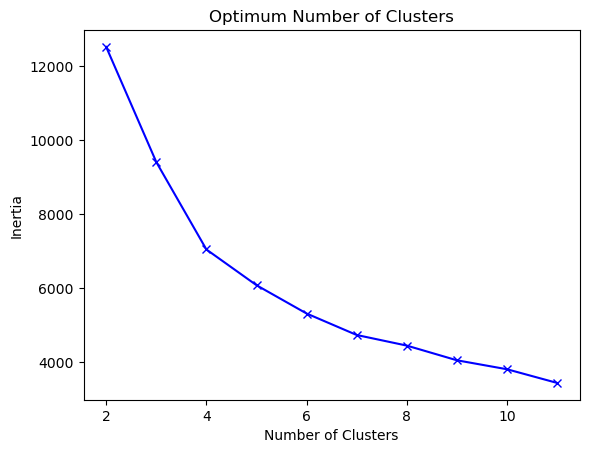

In [11]:
ssd = []
K = range(2, 12)

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(segment_data)
    print(k, kmeans.inertia_)
    ssd.append(kmeans.inertia_)  

plt.plot(K, ssd, "bx-")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Optimum Number of Clusters")
plt.show()



In [12]:
kmeans = KMeans(n_clusters=6).fit(segment_data)
kmeans.labels_

array([3, 1, 1, ..., 2, 1, 4])

In [13]:
segment_data["clusters"] = kmeans.labels_
segment_data

C:\Users\Emre\AppData\Local\Temp\ipykernel_12900\679330521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data["clusters"] = kmeans.labels_


,Recency_Score,Frequency_Score,Monetary_Score,clusters
CustomerID,,,,
12346,2,5,1,3
12347,1,1,1,1
12348,1,2,2,1
12349,5,5,2,5
12350,2,5,4,0
...,...,...,...,...
18280,3,4,5,0
18281,4,4,5,2
18282,4,3,5,2


In [14]:
segment_data["clusters"].value_counts()

clusters
2    1036
1     938
3     645
4     632
0     597
5     490
Name: count, dtype: int64

In [15]:
segment_data

,Recency_Score,Frequency_Score,Monetary_Score,clusters
CustomerID,,,,
12346,2,5,1,3
12347,1,1,1,1
12348,1,2,2,1
12349,5,5,2,5
12350,2,5,4,0
...,...,...,...,...
18280,3,4,5,0
18281,4,4,5,2
18282,4,3,5,2


In [16]:
rfm

,Recency,Tenure,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Tenure_Score,RFM_SCORE,Segment,Basket_Size
CustomerID,,,,,,,,,,,
12346,326,326,1,77183.60,2,5,1,1,251,cant_loose,77183.600000
12347,368,3,7,4310.00,1,1,1,5,111,hibernating,615.714286
12348,359,76,4,1797.24,1,2,2,2,122,hibernating,449.310000
12349,19,19,1,1757.55,5,5,2,4,552,champions,1757.550000
12350,311,311,1,334.40,2,5,4,1,254,cant_loose,334.400000
...,...,...,...,...,...,...,...,...,...,...,...
18280,278,278,1,180.60,3,4,5,1,345,loyal_customers,180.600000
18281,181,181,1,80.82,4,4,5,1,445,loyal_customers,80.820000
18282,127,8,2,178.05,4,3,5,5,435,potential_loyalists,89.025000


In [17]:
segmentation = rfm[["Segment"]].merge(segment_data,on="CustomerID") 

In [18]:
segmentation

,Segment,Recency_Score,Frequency_Score,Monetary_Score,clusters
CustomerID,,,,,
12346,cant_loose,2,5,1,3
12347,hibernating,1,1,1,1
12348,hibernating,1,2,2,1
12349,champions,5,5,2,5
12350,cant_loose,2,5,4,0
...,...,...,...,...,...
18280,loyal_customers,3,4,5,0
18281,loyal_customers,4,4,5,2
18282,potential_loyalists,4,3,5,2


In [19]:
pd.crosstab(segmentation["Segment"],segmentation["clusters"])

clusters,0,1,2,3,4,5
Segment,,,,,,
about_to_sleep,0,0,0,16,341,0
at_Risk,164,17,0,302,0,0
cant_loose,157,0,0,11,0,0
champions,0,0,547,0,0,82
hibernating,0,921,0,153,0,0
loyal_customers,257,0,329,33,0,124
need_attention,19,0,0,130,58,0
new_customers,0,0,0,0,16,0
potential_loyalists,0,0,160,0,161,284


# ------------------------------------------

# Hierarchical Clustering

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [21]:
rfm.head()

,Recency,Tenure,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Tenure_Score,RFM_SCORE,Segment,Basket_Size
CustomerID,,,,,,,,,,,
12346,326,326,1,77183.60,2,5,1,1,251,cant_loose,77183.600000
12347,368,3,7,4310.00,1,1,1,5,111,hibernating,615.714286
12348,359,76,4,1797.24,1,2,2,2,122,hibernating,449.310000
12349,19,19,1,1757.55,5,5,2,4,552,champions,1757.550000
12350,311,311,1,334.40,2,5,4,1,254,cant_loose,334.400000


In [22]:
segment_data_H = rfm[["Recency_Score","Frequency_Score","Monetary_Score","Tenure_Score"]]
segment_data_H

,Recency_Score,Frequency_Score,Monetary_Score,Tenure_Score
CustomerID,,,,
12346,2,5,1,1
12347,1,1,1,5
12348,1,2,2,2
12349,5,5,2,4
12350,2,5,4,1
...,...,...,...,...
18280,3,4,5,1
18281,4,4,5,1
18282,4,3,5,5


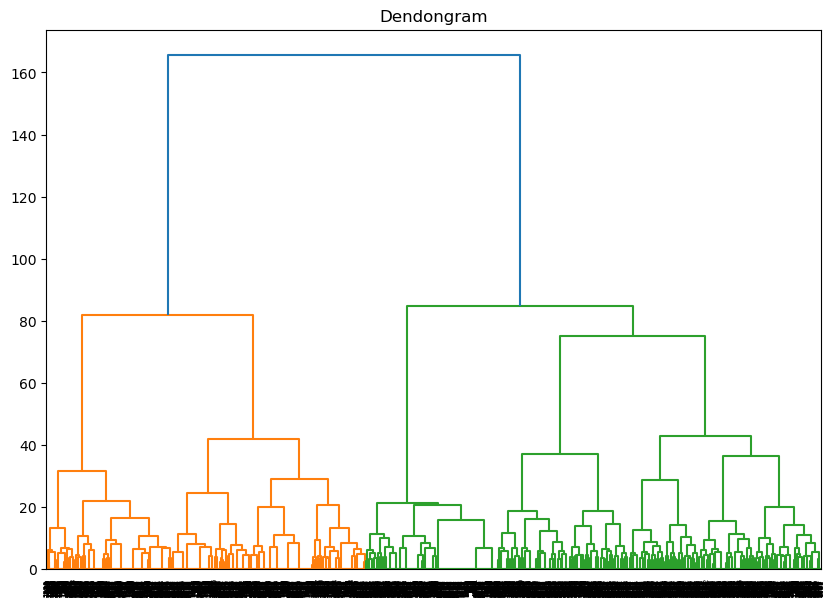

In [23]:
plt.figure(figsize=(10,7))
plt.title("Dendongram")

linkage_method = linkage(segment_data_H,method="ward")
Dendogram = dendrogram(linkage_method)

In [24]:
segment_data_H.head()

,Recency_Score,Frequency_Score,Monetary_Score,Tenure_Score
CustomerID,,,,
12346,2,5,1,1
12347,1,1,1,5
12348,1,2,2,2
12349,5,5,2,4
12350,2,5,4,1


In [25]:
cluster_ea = AgglomerativeClustering(n_clusters=5,linkage="ward")
cluster_labels = cluster_ea.fit_predict(segment_data_H)
segment_data_H["cluster_hy"] = cluster_labels
segment_data_H.head()

C:\Users\Emre\AppData\Local\Temp\ipykernel_12900\3469139528.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data_H["cluster_hy"] = cluster_labels


,Recency_Score,Frequency_Score,Monetary_Score,Tenure_Score,cluster_hy
CustomerID,,,,,
12346,2,5,1,1,1
12347,1,1,1,5,2
12348,1,2,2,2,0
12349,5,5,2,4,3
12350,2,5,4,1,1


In [26]:
segment_data_H["cluster_hy"].value_counts()

cluster_hy
1    1082
0    1072
4     740
2     737
3     707
Name: count, dtype: int64

In [27]:
segmentation = rfm[["Segment"]].merge(segment_data_H,on="CustomerID") 

In [29]:
segmentation

,Segment,Recency_Score,Frequency_Score,Monetary_Score,Tenure_Score,cluster_hy
CustomerID,,,,,,
12346,cant_loose,2,5,1,1,1
12347,hibernating,1,1,1,5,2
12348,hibernating,1,2,2,2,0
12349,champions,5,5,2,4,3
12350,cant_loose,2,5,4,1,1
...,...,...,...,...,...,...
18280,loyal_customers,3,4,5,1,1
18281,loyal_customers,4,4,5,1,1
18282,potential_loyalists,4,3,5,5,4


In [32]:
segmentation.reset_index()

,CustomerID,Segment,Recency_Score,Frequency_Score,Monetary_Score,Tenure_Score,cluster_hy
0,12346,cant_loose,2,5,1,1,1
1,12347,hibernating,1,1,1,5,2
2,12348,hibernating,1,2,2,2,0
3,12349,champions,5,5,2,4,3
4,12350,cant_loose,2,5,4,1,1
...,...,...,...,...,...,...,...
4333,18280,loyal_customers,3,4,5,1,1
4334,18281,loyal_customers,4,4,5,1,1
4335,18282,potential_loyalists,4,3,5,5,4
4336,18283,hibernating,2,1,1,5,2


In [42]:
segmentation["Segment"].value_counts()

Segment
hibernating            1074
loyal_customers         743
champions               629
potential_loyalists     605
at_Risk                 483
about_to_sleep          357
need_attention          207
cant_loose              168
promising                56
new_customers            16
Name: count, dtype: int64

In [38]:
segmentation.groupby("Segment").size()

Segment
about_to_sleep          357
at_Risk                 483
cant_loose              168
champions               629
hibernating            1074
loyal_customers         743
need_attention          207
new_customers            16
potential_loyalists     605
promising                56
dtype: int64

In [43]:
segmentation.groupby("cluster_hy").size()

cluster_hy
0    1072
1    1082
2     737
3     707
4     740
dtype: int64

In [44]:
pd.crosstab(segmentation["Segment"],segmentation["cluster_hy"])

cluster_hy,0,1,2,3,4
Segment,,,,,
about_to_sleep,146,10,59,0,142
at_Risk,273,183,17,0,10
cant_loose,0,168,0,0,0
champions,10,0,0,608,11
hibernating,384,0,661,0,29
loyal_customers,50,605,0,75,13
need_attention,127,42,0,0,38
new_customers,0,0,0,0,16
potential_loyalists,80,74,0,24,427
